# Beispiel für Datenzugriff auf eLabFTW

pyelabdata ist ein Modul, das den einfachen Datenzugriff (lesen/schreiben) auf ELN-Einträge ermöglicht. Dabei wurden bislang die folgenden typischen Szenarien berücksichtigt, wie sie im physikalischen Praktikum vorkommen können:
* Lesen von Tabellendaten (spaltenweise erfasste Daten) aus dem Haupttext des ELN-Eintrags
* Lesen von csv-Dateien, die in einem ELN-Eintrag als Anhang gespeichert wurden
* Hochladen von Bilddateien von Diagrammen, die mittels matplotlib erzeugt wurden

In [1]:
import pyelabdata as elab
import numpy as np
import matplotlib.pyplot as plt

### Verbindung mit eLabFTW
Zunächst wird eine Verbindung zum eLabFTW-Server über die Server-URL und einen API-Key hergestellt.

In eLabFTW werden wir das Experiment mit der ID 274 für diese Beispiele verwenden.

In [2]:
API_HOST_URL = 'https://demo.elabftw.net/api/v2'
API_KEY = '2-68196dcb656b78354aceb018c126ade7f06c37afad482844352a062942bb1bebff86d1529e10d8d320762'
EXP_ID = 274

In [3]:
elab.connect(API_HOST_URL, API_KEY)

### Tabellendaten aus dem Haupttext eines ELN-Eintrags laden
Hierfür wird die ID des ELN-Eintrags benötigt (z.B. id = 274).

In [4]:
data = elab.get_table_data(EXP_ID)
print(data)

{'U (V)': array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), 'I (mA)': array([ 0. ,  4.8, 10.1, 15.3, 19.9, 24.5, 30. , 34.8, 40.4, 45.1, 49.9])}


Die Datenausgabe ist standardmäßig ein dictionary der Datenspalten, wobei die keys (Namen) der Spalten aus der ersten Tabellenzeile extrahiert werden. Alternativ kann auch über den Parameter datatype='df' ein pandas.DataFrame zurückgegeben werden.

Beispiel für die Visualisierung der Daten:

Text(0, 0.5, 'I (mA)')

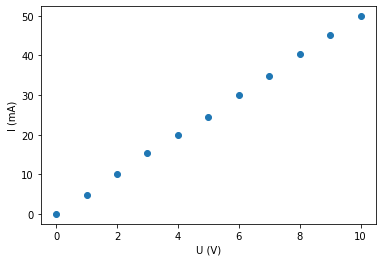

In [5]:
fig, ax = plt.subplots()
ax.scatter(data['U (V)'], data['I (mA)'])
ax.set_xlabel('U (V)')
ax.set_ylabel('I (mA)')

### csv-Datei aus ELN-Eintrag laden
Hierfür werden die ID des ELN-Eintrags sowie der Dateiname benötigt. Die Datenausgabe ist analog zu get_table_data().

In [6]:
data = elab.get_file_csv_data(EXP_ID, 'testdata.txt')
print(data)

{'t(s)': array([0., 1., 2., 3., 4., 5., 9.]), 'U(V)': array([1., 2., 4., 6., 7., 8., 8.])}


Text(0, 0.5, 'U (V)')

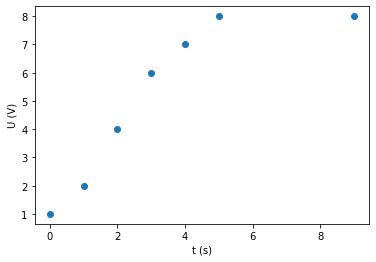

In [7]:
fig, ax = plt.subplots()
ax.scatter(data['t(s)'], data['U(V)'])
ax.set_xlabel('t (s)')
ax.set_ylabel('U (V)')

### Upload von matplotlib Diagrammen in einen ELN-Eintrag
Für den Upload wird die ID des ELN-Eintrags benötigt, in den die Abbildung geladen werden soll. Weiterhin werden das matplotlib Figure-Objekt sowie ein Dateiname und ein Kommentar (Bildbeschreibung) benötigt.

Standardmäßig werden existierende Abbildungen mit gleichem Dateinamen überschrieben. Mit dem Parameter replacefile=False kann das Überschreiben deaktiviert werden; es wird dann mit jedem Upload ein neuer Bildanhang erstellt.

In [8]:
elab.upload_image_from_figure(EXP_ID, fig, 'testdata_plot.png', 'This is a diagram of the data contained in testdata.txt.')

### Upload von numerischen Daten als csv-Datei in einen ELN-Eintrag
Für den Upload wird die ID des ELN-Eintrags benötigt, in dem die csv-Datei erstellt werden soll. Die Upload-Funktion kann eine csv-Datei aus einem DataFrame oder einem Dictionary aus Spaltendaten (numpy arrays) erzeugen; im letzteren Fall, werden die Keys als Spaltenüberschrift verwendet (siehe folgendes Beispiel).

In [9]:
# Wir erzeugen uns zunächst ein Testsignal (Sinusspannung mit einer Amplitude von 1 V und einer Frequenz von 4 Hz,
# 101 Datenpunkte über den Zeitraum von 1 s abgetastet).
t = np.linspace(0, 1, 101)
U = np.sin(2 * np.pi * 4 * t)

# Upload nach eLabFTW
elab.upload_csv_data(EXP_ID, {'t (s)': t, 'U (V)': U}, 'voltage_sine.txt', 'A sine voltage with frequency of 4 Hz.')

### Save and upload this jupyter notebook in einen ELN-Eintrag
Für den Upload dieses Jupyter-Notebooks wird lediglich die ID des ELN-Eintrags benötigt, in den die Datei geladen werden soll sowie eine Beschreibung.

DIESE FUNKTION FUNKTIONIERT ZUR ZEIT NOCH NICHT!!!

In [10]:
elab.upload_this_jupyternotebook(EXP_ID, 'This is a jupyter notebook.')

RuntimeError: Could not retrieve the jupyter notebook filename

### Trennung der Verbindung zum eLabFTW-Server

In [11]:
elab.disconnect()